# biopython

The [Biopython](http://biopython.org/) Project is an international association of developers of freely available [Python](http://www.python.org) tools for computational molecular biology.

[documentation](http://biopython.org/wiki/Documentation) [source](https://github.com/biopython/biopython) [installation](http://biopython.org/wiki/Download) [tutorial](http://biopython.org/DIST/docs/tutorial/Tutorial.html) 

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## example

In [ ]:
from pyquickhelper.filehelper import download
download("https://raw.githubusercontent.com/biopython/biopython/master/Tests/GenBank/NC_005816.gb",
         outfile="NC_005816.gb")

'NC_005816.gb'

In [ ]:
from reportlab.lib import colors
from reportlab.lib.units import cm
from Bio.Graphics import GenomeDiagram
from Bio import SeqIO
record = SeqIO.read("NC_005816.gb", "genbank")

gd_diagram = GenomeDiagram.Diagram("Yersinia pestis biovar Microtus plasmid pPCP1")
gd_track_for_features = gd_diagram.new_track(1, name="Annotated Features")
gd_feature_set = gd_track_for_features.new_set()

for feature in record.features:
    if feature.type != "gene":
        #Exclude this feature
        continue
    if len(gd_feature_set) % 2 == 0:
        color = colors.blue
    else:
        color = colors.lightblue
    gd_feature_set.add_feature(feature, color=color, label=True)

gd_diagram.draw(format="linear", orientation="landscape", pagesize='A4',
                fragments=4, start=0, end=len(record))
gd_diagram.write("plasmid_linear.svg", "svg")

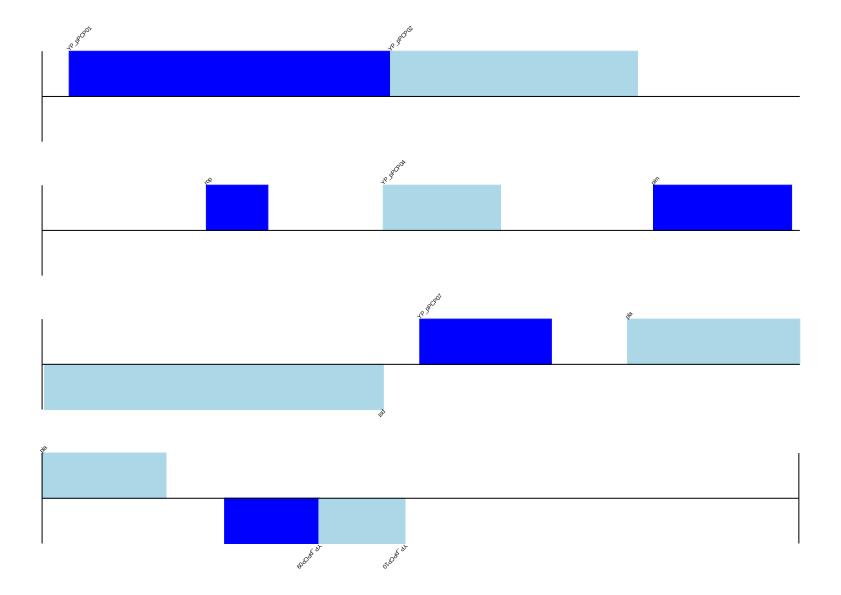

In [ ]:
from IPython.display import SVG
SVG("plasmid_linear.svg")

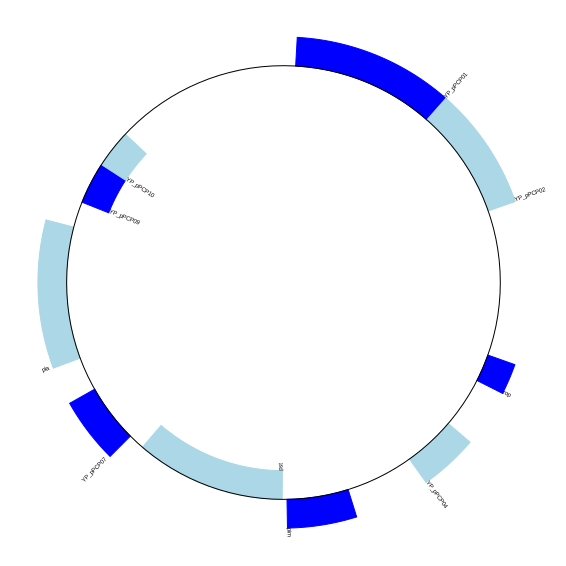

In [ ]:
gd_diagram.draw(format="circular", circular=True, pagesize=(20*cm,20*cm),
                start=0, end=len(record), circle_core=0.7)
gd_diagram.write("plasmid_circular.svg", "svg")
SVG("plasmid_circular.svg")